<a href="https://colab.research.google.com/github/jangdain04-lab/TA_Airpods/blob/main/objective1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [4]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

sns.set(style="whitegrid")
sns.set_color_codes("muted")

rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [10]:
import pandas as pd

path = "/content/kpop-lyrics-analytics/datasets/lyrics_by_year_1964_2023.csv"
df = pd.read_csv(path)
df.head()


,id,year,title,singer,lyric,x_rated
0,30072384,1964,워싱턴광장,정 시스터즈,NaN,False
1,8150699,1964,황혼의 에레지,최양숙,NaN,False
2,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False
3,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False
4,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False


In [11]:
df_filtered = df[(df['year'] >= 1970) & (df['year'] <= 2020)]
df_filtered.shape

(4196, 6)

In [12]:
save_path = "/content/kpop-lyrics-analytics/datasets/lyrics_by_year_1970_2020.csv"
df_filtered.to_csv(save_path, index=False)

save_path


'/content/kpop-lyrics-analytics/datasets/lyrics_by_year_1970_2020.csv'

In [13]:
!pip install kiwipiepy tqdm wordcloud matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.1 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.22.0-py3-none-any.whl size=79625203 sha256=543c664d89a3967d71655c752a68705600ef4e517be402897f3c95a3e3bfd116
  Stored in directory: /root/.cache/pip/wheels/e5/4b/3f/aa850a40d0f9709fd4c6d37d48402ca95354264236e1205ea3
Successfully built kiwipiepy_model


In [15]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from kiwipiepy import Kiwi
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

kiwi = Kiwi()


In [16]:
tagged_rows = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    txt = str(row['lyric']).replace("\n", " ")
    tokens = kiwi.tokenize(txt)
    for t in tokens:
        tagged_rows.append([
            row['year'],
            row['id'],
            t.form,
            t.tag
        ])

count_df = pd.DataFrame(tagged_rows, columns=["year", "id", "form", "tag"])
count_df.head()


100%|██████████| 4666/4666 [01:24<00:00, 55.22it/s]


,year,id,form,tag
0,1964,30072384,nan,SL
1,1964,8150699,nan,SL
2,1964,5758967,고요,NNG
3,1964,5758967,하,XSA
4,1964,5758967,ᆫ,ETM


In [17]:
def is_noun(tag):
    return tag in ["NNG", "NNP", "NNB", "NR", "NP"]

def is_verb(tag):
    return tag in ["VV", "VX"]

def is_adj(tag):
    return tag == "VA"

def is_adverb(tag):
    return tag in ["MM", "MAG", "MAJ"]

def is_english(tag):
    return tag == "SL"     # kiwi: 외국어

def is_korean(tag):
    return tag not in ["SL", "SH", "SN"]

def is_invalid(tag):
    return tag in ["UN", "W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION",
                   "W_SERIAL", "IC", "Z_CODA",
                   "USER0","USER1","USER2","USER3","USER4"]


In [18]:
year_summary = {}

for y in range(1970, 2021):
    subset = count_df[count_df['year'] == y]

    nouns = subset[subset['tag'].apply(is_noun)]['form']
    verbs = subset[subset['tag'].apply(is_verb)]['form']

    noun_top = Counter(nouns).most_common(100)
    verb_top = Counter(verbs).most_common(100)

    year_summary[y] = {
        "nouns": noun_top,
        "verbs": verb_top
    }

year_summary[1990]["nouns"][:10], year_summary[1990]["verbs"][:10]


([('나', 586),
  ('사랑', 218),
  ('그대', 213),
  ('너', 153),
  ('수', 127),
  ('마음', 90),
  ('사람', 89),
  ('말', 82),
  ('속', 81),
  ('이제', 76)],
 [('하', 208),
  ('보', 143),
  ('가', 118),
  ('지', 102),
  ('주', 102),
  ('있', 86),
  ('잊', 72),
  ('오', 71),
  ('싶', 69),
  ('않', 67)])

In [19]:
ratio_table = []

for y in range(1970, 2021):
    subset = count_df[count_df['year'] == y]
    total = len(subset)
    english = len(subset[subset['tag'].apply(is_english)])
    korean = total - english

    ratio_table.append([y, total, korean, english, english/total])

ratio_df = pd.DataFrame(ratio_table, columns=["year","total","korean","english","english_ratio"])
ratio_df.head()


,year,total,korean,english,english_ratio
0,1970,2477,2471,6,0.002422
1,1971,3302,3254,48,0.014537
2,1972,5114,5109,5,0.000978
3,1973,5720,5716,4,0.000699
4,1974,5392,5389,3,0.000556


In [21]:
!sudo apt-get update
!sudo apt-get install -y fonts-nanum


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 https://cli.github.com/packages stable InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64

In [26]:
!sudo apt-get update -y
!sudo apt-get install -y fonts-nanum
!fc-cache -fv

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [27]:
import matplotlib.font_manager as fm

[f for f in fm.findSystemFonts() if "Nanum" in f]


['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf']

In [31]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

import matplotlib.font_manager as fm
import matplotlib as mpl

fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams['axes.unicode_minus'] = False


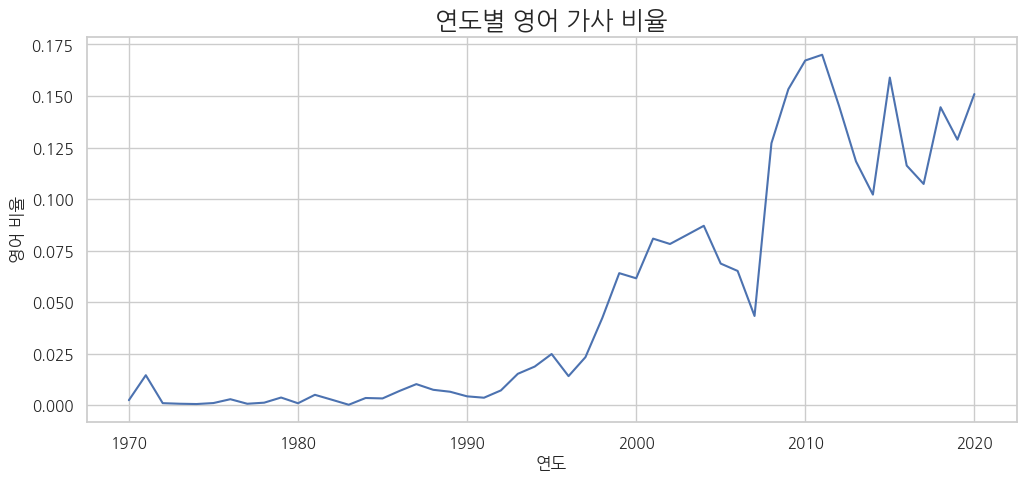

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(data=ratio_df, x='year', y='english_ratio')
plt.title("연도별 영어 가사 비율", fontsize=18)
plt.xlabel("연도")
plt.ylabel("영어 비율")
plt.show()


In [33]:
eng_summary = {}

for y in range(1970, 2021):
    subset = count_df[count_df['year'] == y]
    eng_tokens = subset[subset['tag'].apply(is_english)]['form']
    eng_top = Counter(eng_tokens).most_common(100)
    eng_summary[y] = eng_top

eng_summary[2000][:10]


[('I', 94),
 ('me', 81),
 ('you', 80),
 ('BOUNCE', 64),
 ('the', 50),
 ('u', 49),
 ('love', 46),
 ('with', 45),
 ('what', 39),
 ('knock', 36)]

In [34]:
repeat_table = []

for y in range(1970, 2021):
    subset = count_df[count_df['year'] == y]
    total = len(subset)

    # 의미 없는 토큰 제거
    valid = subset[~subset['tag'].apply(is_invalid)]['form']

    unique = len(set(valid))

    repeat_table.append([
        y,
        total,
        unique,
        unique / total,          # 다양성 (높을수록 다양)
        1 - (unique / total)     # 반복도 (높을수록 많이 반복)
    ])

repeat_df = pd.DataFrame(repeat_table,
                         columns=["year","total","unique","unique_ratio","repetition_ratio"])
repeat_df.head()


,year,total,unique,unique_ratio,repetition_ratio
0,1970,2477,449,0.181268,0.818732
1,1971,3302,533,0.161417,0.838583
2,1972,5114,848,0.165819,0.834181
3,1973,5720,780,0.136364,0.863636
4,1974,5392,698,0.129451,0.870549


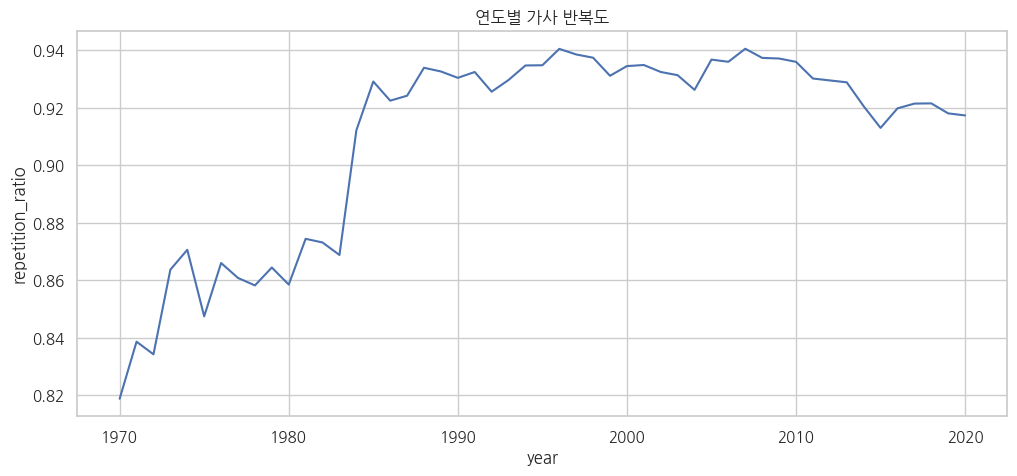

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data=repeat_df, x='year', y='repetition_ratio')
plt.title("연도별 가사 반복도")
plt.show()
